In [1]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt

import textwrap as tw
import datetime
from datetime import timedelta

# preamble for jupyter notebook and django
import django
import platform

if platform.node() == "srv-mcc-apsis":
    sys.path.append("/home/galm/software/django/tmv/BasicBrowser/")
    #sys.path.append('/home/leey/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/home/leey/Documents/Data/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

# import from appended path
import scoping.models as sm
import twitter.models as tm
from tmv_app.models import *

#import parliament.models as pm
#from parliament.tasks import do_search, run_tm
import cities.models as cmodels

from django.contrib.auth.models import User
from django.core import serializers
from django.db.models import Sum, Count, Q
from django.db.models.fields import DateField
from django.db.models.functions import Cast

In [3]:
import re
from collections import Counter

In [2]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 6

dsize = 7.0866142

In [2]:
# Coal tweets total
kt = tm.Status.objects.filter(text__icontains="Kohle")
kt.count()

1079427

In [8]:
users = tm.User.objects
users.count()

5618759

In [9]:
userst = tm.User.objects.filter(monitoring=True)
userst.count()

690

In [10]:
# Coal tweets by parliamentarians
kp = tm.Status.objects.filter(author__monitoring=True,text__icontains="Kohle")
kp.count()

10998

In [11]:
s = tm.Status.objects.filter(
    text__icontains="kohle",
    author__monitoring=True,
    #author__person__isnull=True
).exclude(
    text__iregex="Kohler\W"
)

ats = s.values('author__name').annotate(
    n = Count('pk')
).order_by('-n')

kommission = set(s.distinct('author__id').values_list('author__id',flat=True))
kommission = tm.User.objects.filter(id__in=kommission)

kommission.count()

363

In [12]:
pd.DataFrame(ats)

,author__name,n
0,Initiative Buirer für Buir,2645
1,Hubert Weiger,596
2,BUND,478
3,Martin Kaiser,438
4,"Dr. Julia Verlinden, MdB",430
5,Oliver Krischer,407
6,Lorenz Gösta Beutin,322
7,Annalena Baerbock,297
8,IG BCE,219
9,Jürgen Trittin,147


---

In [3]:
def tweet_time_graph(s, ax, years = None):
    if s.status_set.exists():
        statuses = s.status_set.all()
        if years:
            start = django.utils.timezone.make_aware(datetime.datetime.now()) - datetime.timedelta(days=years*365)
            statuses = statuses.filter(created_at__gt=start)
        
        byday = statuses.annotate(
            date_only=Cast('created_at', DateField())
        ).values('date_only').annotate(
            n = Count('pk')
        ).order_by('date_only')

        df = pd.DataFrame.from_dict(list(byday))

        df.head()

        df['date_only'] = pd.to_datetime(df['date_only'])

        df.plot('date_only','n', style=".", ax=ax, ms=3)
        ax.set_title(s.string)
        return df

In [4]:
terms =  [
    '#Kohlekommission',
    '#Kohleausstieg',
    #'#Klimakrise',
    #'#Klimawandel',
    #'#Klimaschutz',
    '#Hambibleibt',
]

In [5]:
# number of tweets containing terms
# how to not double count?
kht = tm.Status.objects.filter(Q(text__icontains="Kohlekommission")|Q(text__icontains="Kohleausstieg")|Q(text__icontains="Hambibleibt"))
kht.count()

244002

In [ ]:
# number of users 


#Kohlekommission: 14418
most retweeted: 409
campact - @campact - 2018-08-24 09:42:14+00:00
Wenn es nach @RWE_AG geht, soll einer der ältesten Wälder Deutschlands für eine Technologie weichen, deren Ende beschlossene Sache ist. Wir appellieren an die #Kohlekommission und die #Bundesregierung: Retten Sie den #HambacherForst! Hier unterzeichnen: https://t.co/lsjUFgc1NX https://t.co/nR6vJI826G

#Kohleausstieg: 58433
most retweeted: 538
Ralph Goldmann - @RalphGoldmann - 2019-06-21 12:07:32+00:00
Das muss man hochkant sehen. 😳 #FridaysForFurture #aachen #AC2106 #kohleausstieg @ZDFheute pic.twitter.com/5DpBpDbjKm

#Hambibleibt: 127921
most retweeted: 1180
Raphael Thelen - @RaphaelThelen - 2018-10-06 13:14:12+00:00
Die neuen besorgten Bürger: - 50.000 Menschen bei #Hambibleibt - 30.000 Menschen bei #wellcomeunited in Hamburg - 100.000 bei der #Seebrücke in ganz Deutschland - 65.000 bei #wirsindmehr in Chemnitz - 40.000 bei #nopag und #ausgehetzt in München Ist das der Linksruck?


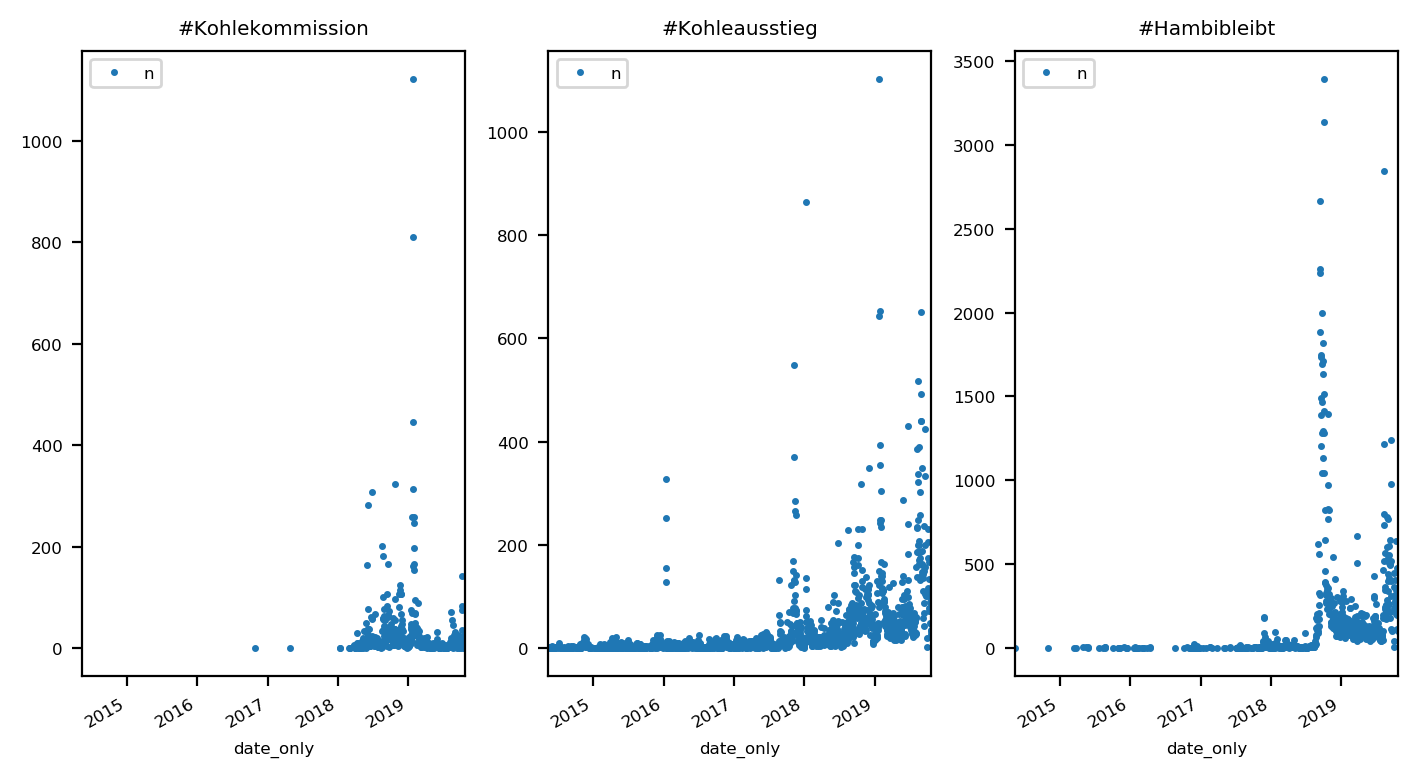

In [6]:
fig = plt.figure(dpi=200,figsize=(dsize,dsize))

i=0
fax = None
for t in terms:
    s, created = tm.TwitterSearch.objects.get_or_create(string=t)
    print(f"\n{s.string}: {s.status_set.count()}")
    if s.status_set.count() > 1:
        ms = s.status_set.order_by('-retweets_count').first()
        print(f"most retweeted: {ms.retweets_count}")
        print(f"{ms.author} - {ms.created_at}")
        print(ms.text)
        
        i+=1
        
        if fax:
            ax = fig.add_subplot(2,3,i,sharex=ax)
        else:
            ax = fig.add_subplot(2,3,i)
            fax = ax
        tweet_time_graph(s, ax)


plt.minorticks_off()
fig.tight_layout()

plt.savefig("plots/hashtags_time.png", bbox_inches='tight')

---

### Loading project

In [2]:
p = sm.Project.objects.get(pk=196)

In [65]:
end_date = datetime.datetime.strptime('2019-10-01-+0000', '%Y-%m-%d-%z')

In [66]:
# Get tweets related to the project
searches = tm.TwitterSearch.objects.filter(project=p)

ttweets = set(tm.Status.objects.filter(
    searches__in=searches,
    text__isnull=False,
    retweeted_status__isnull=True,
    created_at__lte=end_date
).values_list('id',flat=True))

print(len(ttweets))

155559


In [69]:
# get texts
# filter for kohlekommission
texts = tm.Status.objects.filter(
    id__in=ttweets,
    text__contains='#Kohlekommission'
).values_list('text',flat=True)

In [71]:
len(texts)

12168

In [72]:
texts[0]

'.@sigmargabriel: "Wir müssen erst über #Strukturwandel  reden und dann über #Kohleausstieg. Deshalb bin ich gegen die #Kohlekommission ." https://t.co/dy2KlUn0Kd'

In [74]:
taglist = []
regstrip = re.compile('\W\s')
for x in texts:
    match = re.findall('\#.+?\s', x, re.MULTILINE)
    for m in match:
        m1 = regstrip.sub("",m)
        taglist.append(m1.strip().lower())

In [75]:
taglist_df = pd.DataFrame(Counter(taglist).keys(), columns=['Hashtag'])
taglist_df['Count'] = list(Counter(taglist).values())

In [76]:
taglist_df.sort_values(by=['Count'], ascending=False)

,Hashtag,Count
2,#kohlekommission,11380
1,#kohleausstieg,4171
67,#hambacherforst,1253
7,#klimaschutz,871
9,#hambibleibt,839
19,#energiewende,791
2924,#fridaysforfuture,703
11,#endcoal,577
66,#rwe,555
24,#kohle,478


In [6]:
kt = tm.Status.objects.filter(text__icontains="Kohle").values_list('text',flat=True)

In [8]:
# Hashtags for all coal
taglist_kohle = []
regstrip = re.compile('\W\s')
for x in kt:
    match = re.findall('\#.+?\s', x, re.MULTILINE)
    for m in match:
        m1 = regstrip.sub("",m)
        taglist_kohle.append(m1.strip().lower())

In [9]:
taglist_kohle_df = pd.DataFrame(Counter(taglist_kohle).keys(), columns=['Hashtag'])
taglist_kohle_df['Count'] = list(Counter(taglist_kohle).values())

In [11]:
len(taglist_kohle_df)

74409

In [14]:
taglist_kohle_df[taglist_kohle_df.Count > 100].sort_values(by=['Count'], ascending=False)

,Hashtag,Count
89,#kohleausstieg,90903
1,#kohle,43659
118,#kohlekommission,39202
48,#kohlefrei,26700
90,#klimaschutz,20853
115,#hambibleibt,15578
175,#energiewende,15462
114,#hambacherforst,14119
37,#fridaysforfuture,12510
68,#rwe,12453
